## test data sattelite 

We get sattelite data from the NASA API

In [ ]:
! pip install requests
! pip install json
! pip install matplotib.pyplot
! pip install time
! pip install numpy 
! pip install yfinance
! pip install pandas


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement json (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: No matching distribution found for json
ERROR: Could not find a version that satisfies the requirement matplotib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: No matching distribution found for matplotib.pyplot
ERROR: Could not find a version that satisfies the requirement time (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: No matching distribution found for time


In [44]:
#Packages
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io

CODE 200
TYPE image/png


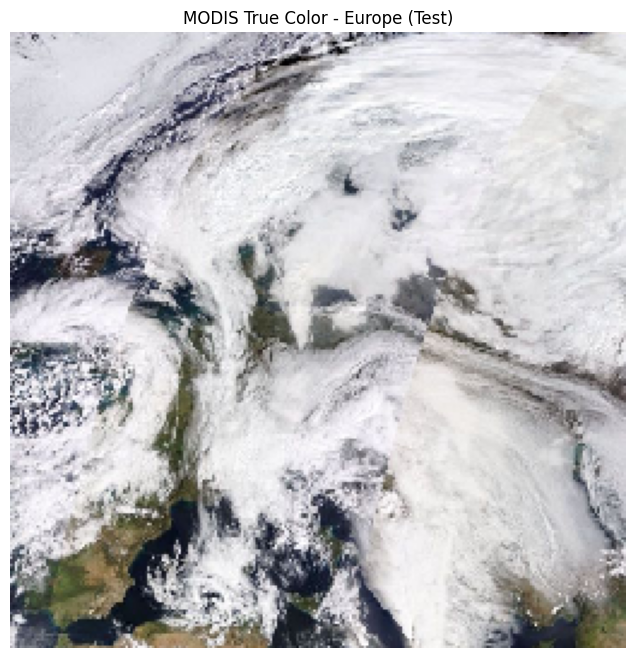

In [ ]:
#get satelite data 

params = {
    "SERVICE": "WMS",
    "REQUEST": "GetMap",
    "VERSION": "1.3.0",
    "LAYERS":  "MODIS_Terra_CorrectedReflectance_TrueColor", #Basic image
    "CRS": "EPSG:4326",
    "BBOX": "35,-10,70,40",
    "WIDTH": 256, # On baisse la résolution 
    "HEIGHT": 256,
    "FORMAT": "image/png",
    "TIME": "2024-03-01", 
    "TRANSPARENT": "FALSE"
}

API_endpoint = "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi"

response = requests.get(API_endpoint, params=params, timeout=30)

print(f"CODE {response.status_code}")
print(f"TYPE {response.headers.get('Content-Type')}")

if response.status_code == 200: #success
    if response.content.startswith(b'\x89PNG'):
        img = mpimg.imread(io.BytesIO(response.content))
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.title("MODIS True Color - Europe (Test)")
        plt.axis('off')
        plt.show()
    else:
        print("Response is not PNG. First 200 chars:")
        print(response.text[:200])
else:
    print(f"Error: {response.status_code}")
    print(response.text[:500]) #Erreur

In [46]:
# get time series

# Faut que on détermine nos features etc... 
